### Künstliche Intelligenz Blatt 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


In [147]:
# Berechnung der Einhüllenden
def hull(b, bFuzzy):
    temp = fuzzyB(b).copy()

    if (temp['schwach'] > 0):
        if (temp['schwach'] > bFuzzy['schwach']):
            if (bFuzzy['schwach'] > temp['mittel']):
                h = bFuzzy['schwach']
            else:
                if (temp['mittel'] <= bFuzzy['mittel']):
                    h = temp['mittel'] 
                else:
                    if ( bFuzzy['schwach'] >  bFuzzy['mittel']):
                        h = bFuzzy['schwach']
                    else:
                        h =  bFuzzy['mittel']

        else:
            if (bFuzzy['schwach'] > bFuzzy['mittel']):
                if (temp['schwach'] > bFuzzy['mittel']):
                    h = temp['schwach']
                else:
                    h = bFuzzy['mittel']
            else:
                h = bFuzzy['mittel']


    elif (temp['mittel'] > 0):
        if (temp['mittel'] > bFuzzy['mittel']):
            if (bFuzzy['mittel'] > temp['stark']):
                h = bFuzzy['mittel']
            else:
                if (temp['stark'] <= bFuzzy['stark']):
                    h = temp['stark']
                else:
                    if (bFuzzy['stark'] > bFuzzy['mittel']):
                        h = bFuzzy['stark']
                    else:
                        h = bFuzzy['mittel']
        else:
            if (temp['mittel'] > bFuzzy['stark']):
                h = temp['mittel']
            else:
                h = bFuzzy['stark']


    elif (temp['stark'] > 0):
        if (temp['stark'] > bFuzzy['stark']):
            h = bFuzzy['stark']
        else:
            h = temp['stark']

    return h 

In [148]:
def inference(dFuzzy, vFuzzy):
    # TODO
    bFuzzy = {
         "stark": max(
               min(vFuzzy["schnell"], dFuzzy["nah"]),
               min(vFuzzy["mittel"], dFuzzy["nah"])
          ),   
         "mittel": max(
               min(vFuzzy["schnell"], dFuzzy["mittel"]),
               min(vFuzzy["langsam"], dFuzzy["nah"])
         ),
         "schwach": min(dFuzzy["mittel"], dFuzzy["mittel"])
         }
    return bFuzzy

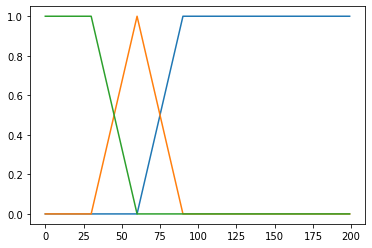

In [149]:
class Geschwindigkeit:
    def schnell(b: int):
        if b > 90: return 1.0
        if b < 60: return 0.0
        return (1/30)*b - 2
    def mittel(b: int):
        if b > 30 and b <= 60: return (1/30)*b - 1
        if b > 60 and b <= 90: return (-1/30)*b + 3
        return 0.0
    def langsam(b: int):
        if b > 60: return 0.0
        if b < 30: return 1.0
        return (-1/30)*b + 2

# Anzeigen der Fuzzyfunktionen
plt.plot([Geschwindigkeit.schnell(x) for x in range(0, 200)])
plt.plot([Geschwindigkeit.mittel(x) for x in range(0, 200)])
plt.plot([Geschwindigkeit.langsam(x) for x in range(0, 200)])

def fuzzyV(v):    
    vFuzzy = {
        "schnell": Geschwindigkeit.schnell(v),
        "mittel": Geschwindigkeit.mittel(v),
        "langsam": Geschwindigkeit.langsam(v)
    }

    return vFuzzy

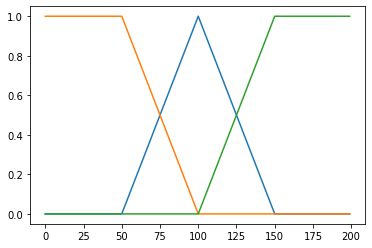

In [150]:
class Abstand:
    def nah(x):
        if x <= 50: return 1.0
        if x > 100: return 0.0
        return -(1/50)*x + 2
    def fern(x):
        if x >= 150: return 1.0
        if x < 100: return 0.0
        return (1/50)*x - 2
    def mittel(x):
        if x > 50 and x < 100: return (1/50)*x - 1
        if x >= 100 and x < 150: return (-1/50)*x + 3
        return 0

# Anzeigen der Fuzzyfunktionen
plt.plot([Abstand.mittel(x) for x in range(0, 200)])
plt.plot([Abstand.nah(x) for x in range(0, 200)])
plt.plot([Abstand.fern(x) for x in range(0, 200)])

def fuzzyD(d):
    dFuzzy = {
        "nah": Abstand.nah(d),
        "mittel": Abstand.mittel(d),
        "fern": Abstand.fern(d)
    }
    return dFuzzy


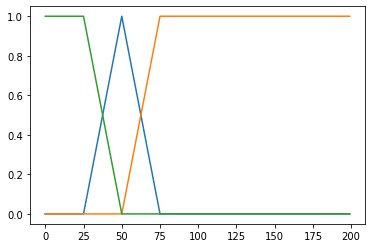

In [151]:
class Bremsstaerke:
    def stark(b: int):
        if b > 75: return 1.0
        if b < 50: return 0.0
        return (1/25)*b - 2
    def mittel(b: int):
        if b > 25 and b <= 50: return (1/25)*b - 1
        if b > 50 and b <= 75: return (-1/25)*b + 3
        return 0.0
    def schwach(b: int):
        if b > 50: return 0.0
        if b < 25: return 1.0
        return (-1/25)*b + 2

# Anzeigen der Fuzzyfunktionen
plt.figure("Bremsstärke")
plt.plot([Bremsstaerke.mittel(x) for x in range(0, 200)])
plt.plot([Bremsstaerke.stark(x) for x in range(0, 200)])
plt.plot([Bremsstaerke.schwach(x) for x in range(0, 200)])

def fuzzyB(b):
    
    bFuzzy = {
        "stark": Bremsstaerke.stark(b),
        "mittel": Bremsstaerke.mittel(b),
        "schwach": Bremsstaerke.schwach(b)
        }
    
    return bFuzzy

In [152]:
def defuzzyB(bFuzzy):
    def mu(x):
        return max(
            max(
                min(Bremsstaerke.schwach(x), bFuzzy["schwach"]),
                min(Bremsstaerke.mittel(x), bFuzzy["mittel"])
            ),
            max(
                min(Bremsstaerke.stark(x), bFuzzy["stark"]),
                min(Bremsstaerke.mittel(x), bFuzzy["mittel"])
            ),

        )
        
            

    plt.figure()    
    plt.plot([mu(i) for i in range(0, 100)])
        
    A = integrate.quad(lambda x: x*mu(x), 0, 100)[0]
    B = integrate.quad(mu, 0, 100)[0]
    return A/B


In [153]:
def fuzzy(v, d):
    # Bestimmung der Eingangsgrößen.
    auto = {'v':v, 'd':d}
    
    # Schritt 1: Fuzzyfizieren der Eingangsgrößen.
    auto['vFuzzy'] = fuzzyV(auto['v'])
    auto['dFuzzy'] = fuzzyD(auto['d'])

    # Schritt 2: Inferenz, Bestimmung der Ausgangsgröße in fuzzyfizierter Form.
    auto['bFuzzy'] = inference(auto['dFuzzy'], auto['vFuzzy'])

    # Schritt 3: Defuzzyfizieren der Ausgangsgröße.
    auto['b'] = defuzzyB(auto['bFuzzy'])

    print(auto)
    
    # Ausgabe Diagramme.
    v = np.linspace(0,200,2001)
    vL = np.zeros(len(v))
    vM = np.zeros(len(v))
    vS = np.zeros(len(v))

    d = np.linspace(0,200,2001)
    dN = np.zeros(len(d))
    dM = np.zeros(len(d))
    dF = np.zeros(len(d))

    b  = np.linspace(0,100,1001)
    bW = np.zeros(len(b))
    bM = np.zeros(len(b))
    bS = np.zeros(len(b))

    h  = np.zeros(len(b))

    for i in range(len(v)):
        temp = fuzzyV(v[i]);
        vL[i] = temp['langsam']
        vM[i] = temp['mittel']
        vS[i] = temp['schnell']

        temp = fuzzyD(d[i]);
        dN[i] = temp['nah']
        dM[i] = temp['mittel']
        dF[i] = temp['fern']

    for i in range(len(b)):
        temp = fuzzyB(b[i])
        bW[i] = temp['schwach']
        bM[i] = temp['mittel']
        bS[i] = temp['stark']

        h[i]  = hull(b[i], auto['bFuzzy'])

    # Geschwindigkeit
    plt.figure()
    plt.plot(v, vL)
    plt.plot(v, vM, 'r')
    plt.plot(v, vS, 'k')
    plt.plot([auto['v'], auto['v']], [0, 1], 'm--')

    plt.xlim([-5, 205]);
    plt.ylim([-0.1, 1.1]);
    plt.xlabel('Geschwindigkeit [km/h]');
    plt.ylabel('µ');
    plt.legend([r'$\mu_{v,langsam}$', r'$\mu_{v,mittel}$', r'$\mu_{v,schnell}$'])
    plt.grid()

    # Abstand
    plt.figure()
    plt.plot(d, dN)
    plt.plot(d, dM, 'r')
    plt.plot(d, dF, 'k')
    plt.plot([auto['d'], auto['d']], [0, 1], 'm--')

    plt.xlim([-5, 205])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('Abstand [m]')
    plt.ylabel('µ')
    plt.legend([r'$\mu_{d,nah}$', r'$\mu_{d,mittel}$', r'$\mu_{d,fern}$'])
    plt.grid()

    #Bremsen
    plt.figure()
    plt.plot(b, bW)
    plt.plot(b, bM, 'r')
    plt.plot(b, bS, 'k')
    plt.plot(b, h, 'm--')

    plt.xlim([-2.5, 102.5])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('Bremsintensität [%]')
    plt.ylabel('µ')
    plt.legend([r'$\mu_{b,schwach}$', r'$\mu_{b,mittel}$', r'$\mu_{b,stark}$'])
    plt.grid()


{'v': 80, 'd': 70, 'vFuzzy': {'schnell': 0.6666666666666665, 'mittel': 0.3333333333333335, 'langsam': 0.0}, 'dFuzzy': {'nah': 0.5999999999999999, 'mittel': 0.40000000000000013, 'fern': 0.0}, 'bFuzzy': {'stark': 0.5999999999999999, 'mittel': 0.40000000000000013, 'schwach': 0.40000000000000013}, 'b': 54.92928520947031}


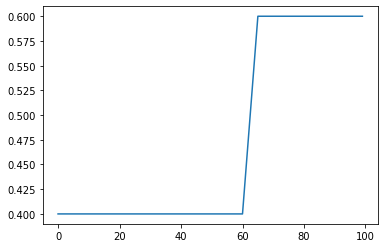

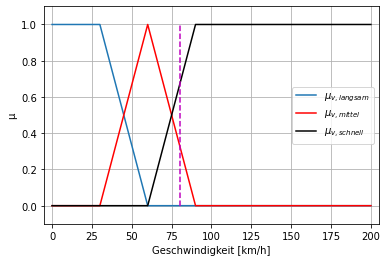

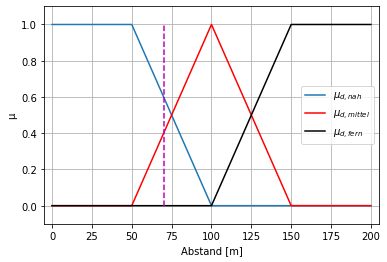

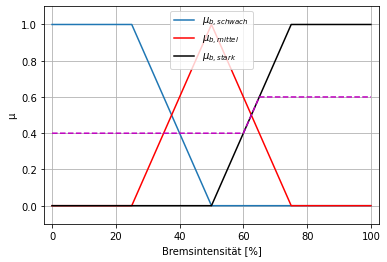

In [156]:
# Los geht's
fuzzy(80, 70)